# What to learn

| Part I                                 |   | Part II                                   |
|----------------------------------------|---|-------------------------------------------|
|                                        |   |                                           |
| Supervised vs. Unsupervised            |   | Underfitting vs. Overfitting              |
|                                        |   |                                           |
| Generative vs. Discriminative          |   | Training/Validation/Test/Cross Validation |
|                                        |   |                                           |
| Precision, Recall, Confusion matrix    |   | Bias-Variance dilemma                     |
|                                        |   |                                           |
| MAE, RMSE, R square                    |   | Regularization, Normalization             |
|                                        |   |                                           |
| Feature Score, Importance, Matrix      |   | boosting, bagging, stacking - ensemble    |


# Questions to be answered

1. What is Machine Learning?

<CR>
<CR>

2. What kinds of Machine Learning problems are there?

<CR>
<CR>
    
3. What kinds of approaches can be taken to develop a model?
    
<CR>
<CR>
    
4. How can we compare if a model A works better than a model B?

<CR>
<CR>
    
5. How do we know if a set of features A is better than a set of feature B? How do we know if some data points are possibly not relevant?
    

# Four components of Machine Learning

- the definition of ML is mostly widely quoted by Tom Mitchell: take a look at [Wikipedia](https://en.wikipedia.org/wiki/Machine_learning), in nutshell,

<cr>

- ALGORITHMs that enable AUTOMATICALLY: more EXPERIENCE -> better PERFORMANCE on a TASK

<cr>
    
- TASK ~= PROBLEM
- AUTOMATIC ALGORITHM ~= MODEL
- PERFORMANCE ~= ACCURACY, OBJECTIVE, some measure, ...
- EXPERIENCE ~= DATA

<cr>
    
- exercise: 
  - what are PROBLEMs, MODELs, DATA, MEASURE for our titanic exercise or for our preject?
  - do our titanic exercise and our preject belong to Machine Learning? 

# Component 1: TASK (a.k.a PROBLEM)

- Task type 1. is it a picture of a cat or a dog? Are the heights of fathers related to the heights of sons? and how?

<cr>

- Task type 2. is a new occurance of credit-card usage fraud or a normal activity given there was no fraud before?
How many categories of different land usage given areas are there?

<cr>

- Task type 3. how does a robot find a path around a number of barriers that he has not seen yet?

<cr>
<cr>

- discuss:
    - how would you teach the computer to solve the tasks above? what should be inputs and outputs of those problems? 
    - coming up with other examples of supervised, unsupervised, reinforcement learning

# Component 2: AUTOMATIC ALGORITHM (a.k.a MODEL) 

- we restrict ourselves here for supervised learning

<cr>
    
- Bayesian vs. Frequentist

Bayes' Theorem: 
$$ Prob ( \textrm{Hypothesis_i} | \textrm{Observation} ) = \frac{Prob( \textrm{Observation} | \textrm{Hypothesis_i} ) \times Prob ( \textrm{Hypothesis_i} )}{Prob ( \textrm{Observation} )} $$

where $$ Prob ( \textrm{Observation} ) = \sum_{i} Prob ( \textrm{Observation} | \textrm{Hypothesis_i} ) * Prob ( \textrm{Hypothesis_i} ) $$

In other words,
$$ \textrm{Posterior} = \frac{ \textrm{Likelihood} \times \textrm{Prior} }{ \textrm{Evidence} } $$

<cr>

- discuss: how does it apply to 
    - Task 1-A. Is it a dog or a cat?
    - Task 1-B. Are the heights of fathers related to the heights of sons? and how?
    

# Component 3: PERFORMANCE (a.k.a ACCURACY MEASURE)

- we restrict ourselves here for classification

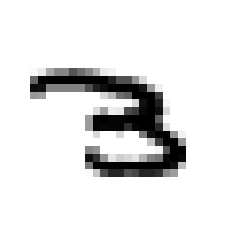

'3'

In [4]:
%matplotlib inline
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
mnist = fetch_openml('mnist_784')
plt.imshow(mnist['data'][250].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()
mnist['target'][250]

confusion matrix:
 [[8970  118]
 [ 254  658]]
precision: 0.8479381443298969
recall: 0.7214912280701754
f1_score: 0.7796208530805686


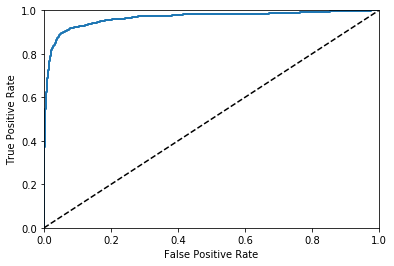

0.9655060123625525


In [28]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

np.random.seed(42)
shuffle_index = np.random.permutation(70000)
X, y = mnist['data'][shuffle_index], mnist['target'][shuffle_index]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
y_pred_5 = sgd_clf.predict(X_test)

print('confusion matrix:\n', confusion_matrix(y_test_5, y_pred_5))
print('precision:', precision_score(y_test_5, y_pred_5))
print('recall:', recall_score(y_test_5, y_pred_5))
print('f1_score:', f1_score(y_test_5, y_pred_5))

y_scores = sgd_clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test_5, y_scores)
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(auc(fpr, tpr))

## Metrics for Classification

- discuss: in which situations one measure is more useful and others?

<CR>
    
   - Situation A. guilty or not guilty: someone had been put on trial for murder

<CR>

   - Situation B. sick or not sick: a medical screening for a disease 

<CR>

   - Situation C. classifying 12 different gestures

<CR>

   - Situation D. for a device of semi-conductor, we are given with some number how likely the device is out of order.
   
<CR>
$$ \textrm{Precision} = \frac{TP}{TP + FP}, \quad \textrm{Recall} = \frac{TP}{TP + FN} $$
$$ F_1 = \frac{2}{1/\textrm{Precision} + 1/\textrm{Recall}} $$

# Component 3: PERFORMANCE (a.k.a ACCURACY MEASURE)

- we restrict ourselves here for regression

$$ MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i} )^2 $$
$$ MAE = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y_i} | $$
$$ R^2 = 1 - \frac{\sum_{i=1}^{N} (y_i - \hat{y_i} )^2 }{\sum_{i=1}{N} (y_i - \overline{y_i} )^2} $$

In [6]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

boston = load_boston()
print(boston.data.shape)

np.random.seed(42)
shuffle_index = np.random.permutation(506)
X, y = boston.data[shuffle_index], boston.target[shuffle_index]
X_train, X_test, y_train, y_test = X[:400, :], X[400:, :], y[:400], y[400:]

reg = LinearRegression()
reg.fit(boston.data, boston.target)
y_pred = reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_absolute_error(y_test, y_pred))
print('R square:', r2_score(y_test, y_pred))

(506, 13)
MAE: 3.102301858804688
MSE: 3.102301858804688
R square: 0.6932297543250983


# Component 4: EXPERIENCE (a.k.a DATA)

- how to choose relevant data or features?

<CR>

- how do you know if regression is improved after adding a new feature?

<CR>

- how do you know if classification is improved after adding a new feature?

<CR>

- how do you know if some data points are not relevant, in other words, if they are outliers?

<CR>
<CR>

- how do we get data? APIs and scraping will be covered in the next class

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              693.3
Date:                Wed, 09 Oct 2019   Prob (F-statistic):                   9.67e-259
Time:                        14:02:25   Log-Likelihood:                         -1207.4
No. Observations:                 400   AIC:                                      2441.
Df Residuals:                     387   BIC:                                      2493.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

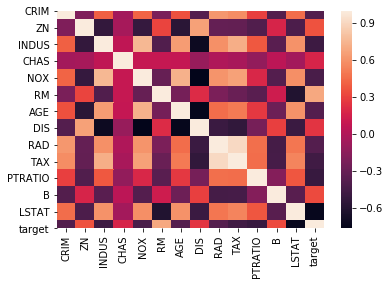

In [7]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

est = sm.OLS(y_train, X_train)
est_fit = est.fit()
print(est_fit.summary())
columns = list(boston['feature_names'])
columns.append('target')
df_boston = pd.DataFrame(data = np.c_[boston['data'], boston['target']], columns = columns)
sns.heatmap(df_boston.corr())

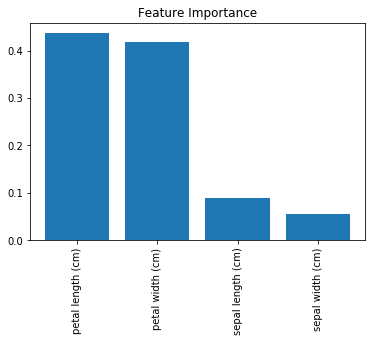

               Specs      Scores
0  sepal length (cm)   10.817821
1   sepal width (cm)    3.710728
2  petal length (cm)  116.312613
3   petal width (cm)   67.048360


In [18]:
from sklearn.datasets import load_iris
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

iris = load_iris()
clf = ExtraTreesClassifier(random_state=42, n_estimators=250)
model = clf.fit(iris.data, iris.target)
importance = model.feature_importances_

indices = np.argsort(importance)[::-1]
names = [iris.feature_names[i] for i in indices]
plt.title('Feature Importance')
plt.bar(range(iris.data.shape[1]), importance[indices])
plt.xticks(range(iris.data.shape[1]), names, rotation=90)
plt.show()

features = SelectKBest(score_func=chi2, k=4)
fit = features.fit(iris.data, iris.target)
df = pd.DataFrame({'Specs': iris.feature_names, 'Scores': fit.scores_})
print(df)

/home/heuna/Documents/p2_redi/.venv3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


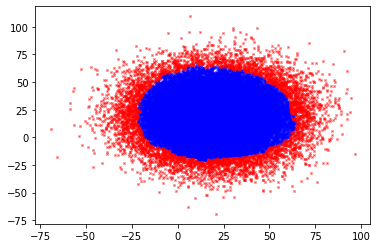

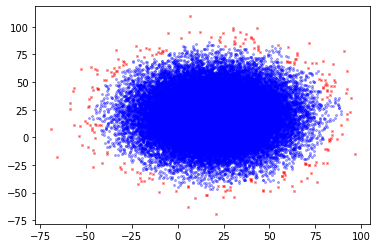

In [27]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import numpy as np
np.random.seed(42)
random_data = np.random.randn(50000, 2) * 20 + 20

clf_if = IsolationForest(behaviour='new', max_samples=100, random_state = 42)
preds_if = clf_if.fit_predict(random_data)
inlier = random_data[preds_if == 1, :]
outlier = random_data[preds_if == -1, :]
plt.plot(inlier[:, 0], inlier[:, 1], 'bo', ms=2, alpha=0.3)
plt.plot(outlier[:, 0], outlier[:, 1], 'rx', ms=2, alpha=0.7)
plt.show()

clf_dbscan = DBSCAN(min_samples = 2, eps = 3)
preds_dbscan = clf_dbscan.fit_predict(random_data)
inlier = random_data[preds_dbscan == 0, :]
outlier = random_data[preds_dbscan != 0, :]
plt.plot(inlier[:, 0], inlier[:, 1], 'bo', ms=2, alpha=0.3)
plt.plot(outlier[:, 0], outlier[:, 1], 'rx', ms=2, alpha=0.7)
plt.show()

# Review: Can you answer those questions?

1. What is Machine Learning?

<CR>
<CR>

2. What kinds of Machine Learning problems are there?

<CR>
<CR>
    
3. What kinds of approaches can be taken to develop a model?
    
<CR>
<CR>
    
4. How can we compare if a model A works better than a model B?

<CR>
<CR>
    
5. How do we know if a set of features A is better than a set of feature B? How do we know if some data points are possibly not relevant?